##### **2022 Presidential Election Candidates Twitter Archive EDA Research**

This project explores the 2022 presidential election candidates tweets with a text-based ideal points model for interpretable results.

##### **Abstract** 

In the realm of socio-politics, quantified analyses and modeling techniques are applied in supporting and facilitating the presidential election. Different parties (here we are mainly discussing the two major parties: the GOP and the Democratic Party) and party members that belong to either the Senate or the House come together creating campaigns in hope to receive appropriate patrionization and support for their political agenda. 

Here, this project tries to 
 This project will first break down all the candidates of 2022 their basic information as mentioned above including their demographics, background, ballotpedia page, recent political agenda, news, and finances. The candidates information is retrievable through the Federal Election Commission's directory. This project seeks to conduct the research with full transparency and abide to relevant conduct code. 

Then, this project will go on and collect texts through each candidate's campaign website and relevant Twitter data that's tied to each candidate and explore the tweets and messages that each candidate puts out. This project will also try to understand how the finances work in terms of supporting each candidates campaign activities and lobbying. 

##### **Literature Review**



##### **Tools**
This project hopes to utilize appropriate coding, NLP techniques, statistical inferences to connect everything together and create a platform that could present all the findings in a more visually intuitive way. The tools that will be used for each step in the downstream tasks are listed below,

`Python + Jupyter` Notebook to host all the coding parts for info gathering. 

Raw data will be processed with `pandas` into separate `csv` files. 

`T2V` The raw texts will be processed with relevant NLP tools, annotated with `brat(an annotatoin tool)`, in the end turned in to vectors for either `classification or regression` in hope to facilitate further analysis. 

`Clustering` might also be carried out using NLP techniques such as `SVM` or `LDA` in hope to dig deeper into connecting purtaining relevant political issues that each candidate supports.

For `demo` part, this project will use `matplotlib` or `bokeh` as the scientific visualization tool to host all the quantitative data and information gathered and `Tableau` for final presentattion. 

Source code and write-up will be hosted on `Github`. In terms of web hosting, this project will use `streamlit`.

##### **Basic Demographics** 

Here through the FEC's website, I was able to download all the candidates for 2022's electorial campaigns PAC candidates' information. 
Below is the description title and details to each candidate's personal info, party details, and financial informaiton along with sample data.

In [15]:
import pandas as pd
import os
# change dir
import pathlib
os.chdir(pathlib.Path(os.path.realpath(os.getcwd())))
description = pd.read_csv('./resources/candidates/txt_description.csv')
description

,Column name,Field name,Position,Null,Data type,Description,Example data
0,CAND_ID,Candidate identification,1,N,VARCHAR2 (9),NaN,H8VA01233
1,CAND_NAME,Candidate name,2,Y,VARCHAR2(200),NaN,Martha Washington
2,CAND_ICI,Incumbent challenger status,3,Y,VARCHAR2(1),NaN,I
3,PTY_CD,Party code,4,Y,VARCHAR2(1),NaN,NON
4,CAND_PTY_AFFILIATION,Party affiliation,5,Y,VARCHAR2(3),NaN,NON
5,TTL_RECEIPTS,Total receipts,6,Y,"Number(14,2)",NaN,"345,456.34"
6,TRANS_FROM_AUTH,Transfers from authorized committees,7,Y,"Number(14,2)",NaN,4000
7,TTL_DISB,Total disbursements,8,Y,"Number(14,2)",NaN,175645.21
8,TRANS_TO_AUTH,Transfers to authorized committees,9,Y,"Number(14,2)",NaN,0
9,COH_BOP,Beginning cash,10,Y,"Number(14,2)",NaN,845901.23


Below will print out all the candidates actual data wrt. the descriptions and code above. And data is cleaned up done through basic processing. 

In [36]:
field = description['Field name']
pac = pd.read_csv('./resources/candidates/weball/weball22.txt', names=field, nrows=5,sep='|')
pac.fillna('', inplace=True)
pac

,Candidate identification,Candidate name,Incumbent challenger status,Party code,Party affiliation,Total receipts,Transfers from authorized committees,Total disbursements,Transfers to authorized committees,Beginning cash,...,Special election status,Primary election status,Runoff election status,General election status,General election percentage,Contributions from other political committees,Contributions from party committees,Coverage end date,Refunds to individuals,Refunds to committees
0,H2AK01059,"PURHAM, RANDY",C,2,REP,948.14,0.00,3492.14,0,140.00,...,,,,,,0,0,09/30/2021,0,0
1,H2AK01075,"BRELSFORD, GREGG BOWYER MR.",C,2,REP,25616.93,0.00,9785.51,0,0.00,...,,,,,,0,0,09/30/2021,0,0
2,H6AK00045,"YOUNG, DONALD E",I,2,REP,370578.95,130540.45,139805.10,0,249173.19,...,,,,,,101000,0,09/30/2021,0,0
3,H8AK00140,"GALVIN, ALYSE",C,3,IND,28303.62,1169.54,12212.15,0,96593.70,...,,,,,,0,0,09/30/2021,0,0
4,H0AL01097,"AVERHART, JAMES",O,1,DEM,0.00,0.00,1000.00,0,1121.71,...,,,,,,0,0,09/30/2021,0,0


With some processing and data collection, we were able to locate 3994 PAC candidates for 2022 presidential election. 

In [51]:
candidates = pd.read_csv('./candidates.csv')
# dropped error columns
candidates = candidates.drop(labels='Unnamed: 0',axis=1)
candidates

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,CAND_OFFICE_DISTRICT,CAND_ICI,ELECT_TYPE,STATE_FULL,CAND_PTY_AFFILIATION_FULL,search_query,campaign_results_list
0,H8AK00132,"SHEIN, DIMITRI",DEM,AK,0,Challenger,House,Alaska,Democrat,"SHEIN, DIMITRI Democrat Alaska House","SHEIN, DIMITRI Democrat Alaska House 2021"
1,H6AK00045,"YOUNG, DONALD E",REP,AK,0,Incumbent,House,Alaska,Republican,"YOUNG, DONALD E Republican Alaska House","YOUNG, DONALD E Republican Alaska House 2021"
2,H8AK01031,"NELSON, THOMAS JOHN",REP,AK,0,Challenger,House,Alaska,Republican,"NELSON, THOMAS JOHN Republican Alaska House","NELSON, THOMAS JOHN Republican Alaska House 2021"
3,H8AK00140,"GALVIN, ALYSE",IND,AK,0,Challenger,House,Alaska,Independent,"GALVIN, ALYSE Independent Alaska House","GALVIN, ALYSE Independent Alaska House 2021"
4,H0AL01097,"AVERHART, JAMES",DEM,AL,1,Open seat,House,Alabama,Democrat,"AVERHART, JAMES Democrat Alabama House","AVERHART, JAMES Democrat Alabama House 2021"
...,...,...,...,...,...,...,...,...,...,...,...
3989,S0WY00186,"HOLTHUS, ROLLAND SCOTT MR",REP,WY,0,Open seat,Senate,Wyoming,Republican,"HOLTHUS, ROLLAND SCOTT MR Republican Wyoming S...","HOLTHUS, ROLLAND SCOTT MR Republican Wyoming S..."
3990,S4WY00097,"HARDY, CHARLES E",REP,WY,0,Challenger,Senate,Wyoming,Republican,"HARDY, CHARLES E Republican Wyoming Senate","HARDY, CHARLES E Republican Wyoming Senate 2021"
3991,S4WY00147,"MILLER, BRYAN",REP,WY,0,Open seat,Senate,Wyoming,Republican,"MILLER, BRYAN Republican Wyoming Senate","MILLER, BRYAN Republican Wyoming Senate 2021"
3992,S6WY00068,"BARRASSO, JOHN A",REP,WY,0,Incumbent,Senate,Wyoming,Republican,"BARRASSO, JOHN A Republican Wyoming Senate","BARRASSO, JOHN A Republican Wyoming Senate 2021"


Answering some basic demographics questions, 

1. How many candidates for each election type?
2. How many candidates for each political party affiliation? 
3. How many candidates for each state?
4. How many candidates for each candidates ICI status?

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

<Figure size 576x360 with 0 Axes>

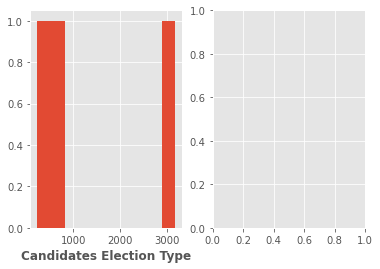

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# first we are plotting the data 
plt.figure(figsize=(8,5))
q1 = candidates.loc[:,'ELECT_TYPE'].value_counts()
q2 = candidates.loc[:,'CAND_PTY_AFFILIATION_FULL'].value_counts()
q3 = candidates.loc[:,'STATE_FULL'].value_counts()
q4 = candidates.loc[:,'CAND_ICI'].value_counts()

# for idx, ax in enumerate(data):

# ax.plot(v)

# q1
fig, ax = plt.subplots(1,4)
ax[0].hist(q1)
ax[0].set_xlabel('Candidates Election Type', 
               fontweight ='bold')  
ax.set_title('matplotlib.axes.Axes.set_xlabel()\
 Examples\n', fontsize = 12, fontweight ='bold')

#q2
 ax[0].set_xlabel(' Party Affiliation Value Count
', 
               fontweight ='bold') 
plt.show()